In [ ]:
# ============================
# # California Housing Price Prediction
# ----------------------------
# **Objective:** Predict median house values in California districts using district-level features.
# This notebook includes: 
# - Data exploration
# - Preprocessing
# - Simple and Multiple Linear Regression
# - Model evaluation and interpretation
# ============================

# ----------------------------
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Load Dataset
df = pd.read_csv('data_1.csv')

In [ ]:
# Quick overview
df.info()    # Check types & missing values
df.describe() # Statistical summary
df.head(10) # First 10 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.isnull().sum().sort_values(ascending=False) # Check missing values per column


total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
# Group by ocean proximity and compute average house value
ocean_prices = df.groupby('ocean_proximity')['median_house_value'].mean().sort_values()
print(ocean_prices)


ocean_proximity
INLAND        124805.392001
<1H OCEAN     240084.285464
NEAR OCEAN    249433.977427
NEAR BAY      259212.311790
ISLAND        380440.000000
Name: median_house_value, dtype: float64


In [ ]:
# Assign mean house value per category
category_means = df.groupby('ocean_proximity')['median_house_value'].mean()
print(category_means) 
df['ocean_proximity'] = df['ocean_proximity'].map(category_means)


ocean_proximity
<1H OCEAN     240084.285464
INLAND        124805.392001
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
Name: median_house_value, dtype: float64


In [ ]:
median = df['total_bedrooms'].median()# Fill missing total_bedrooms with median
df['total_bedrooms'].fillna(median, inplace=True)


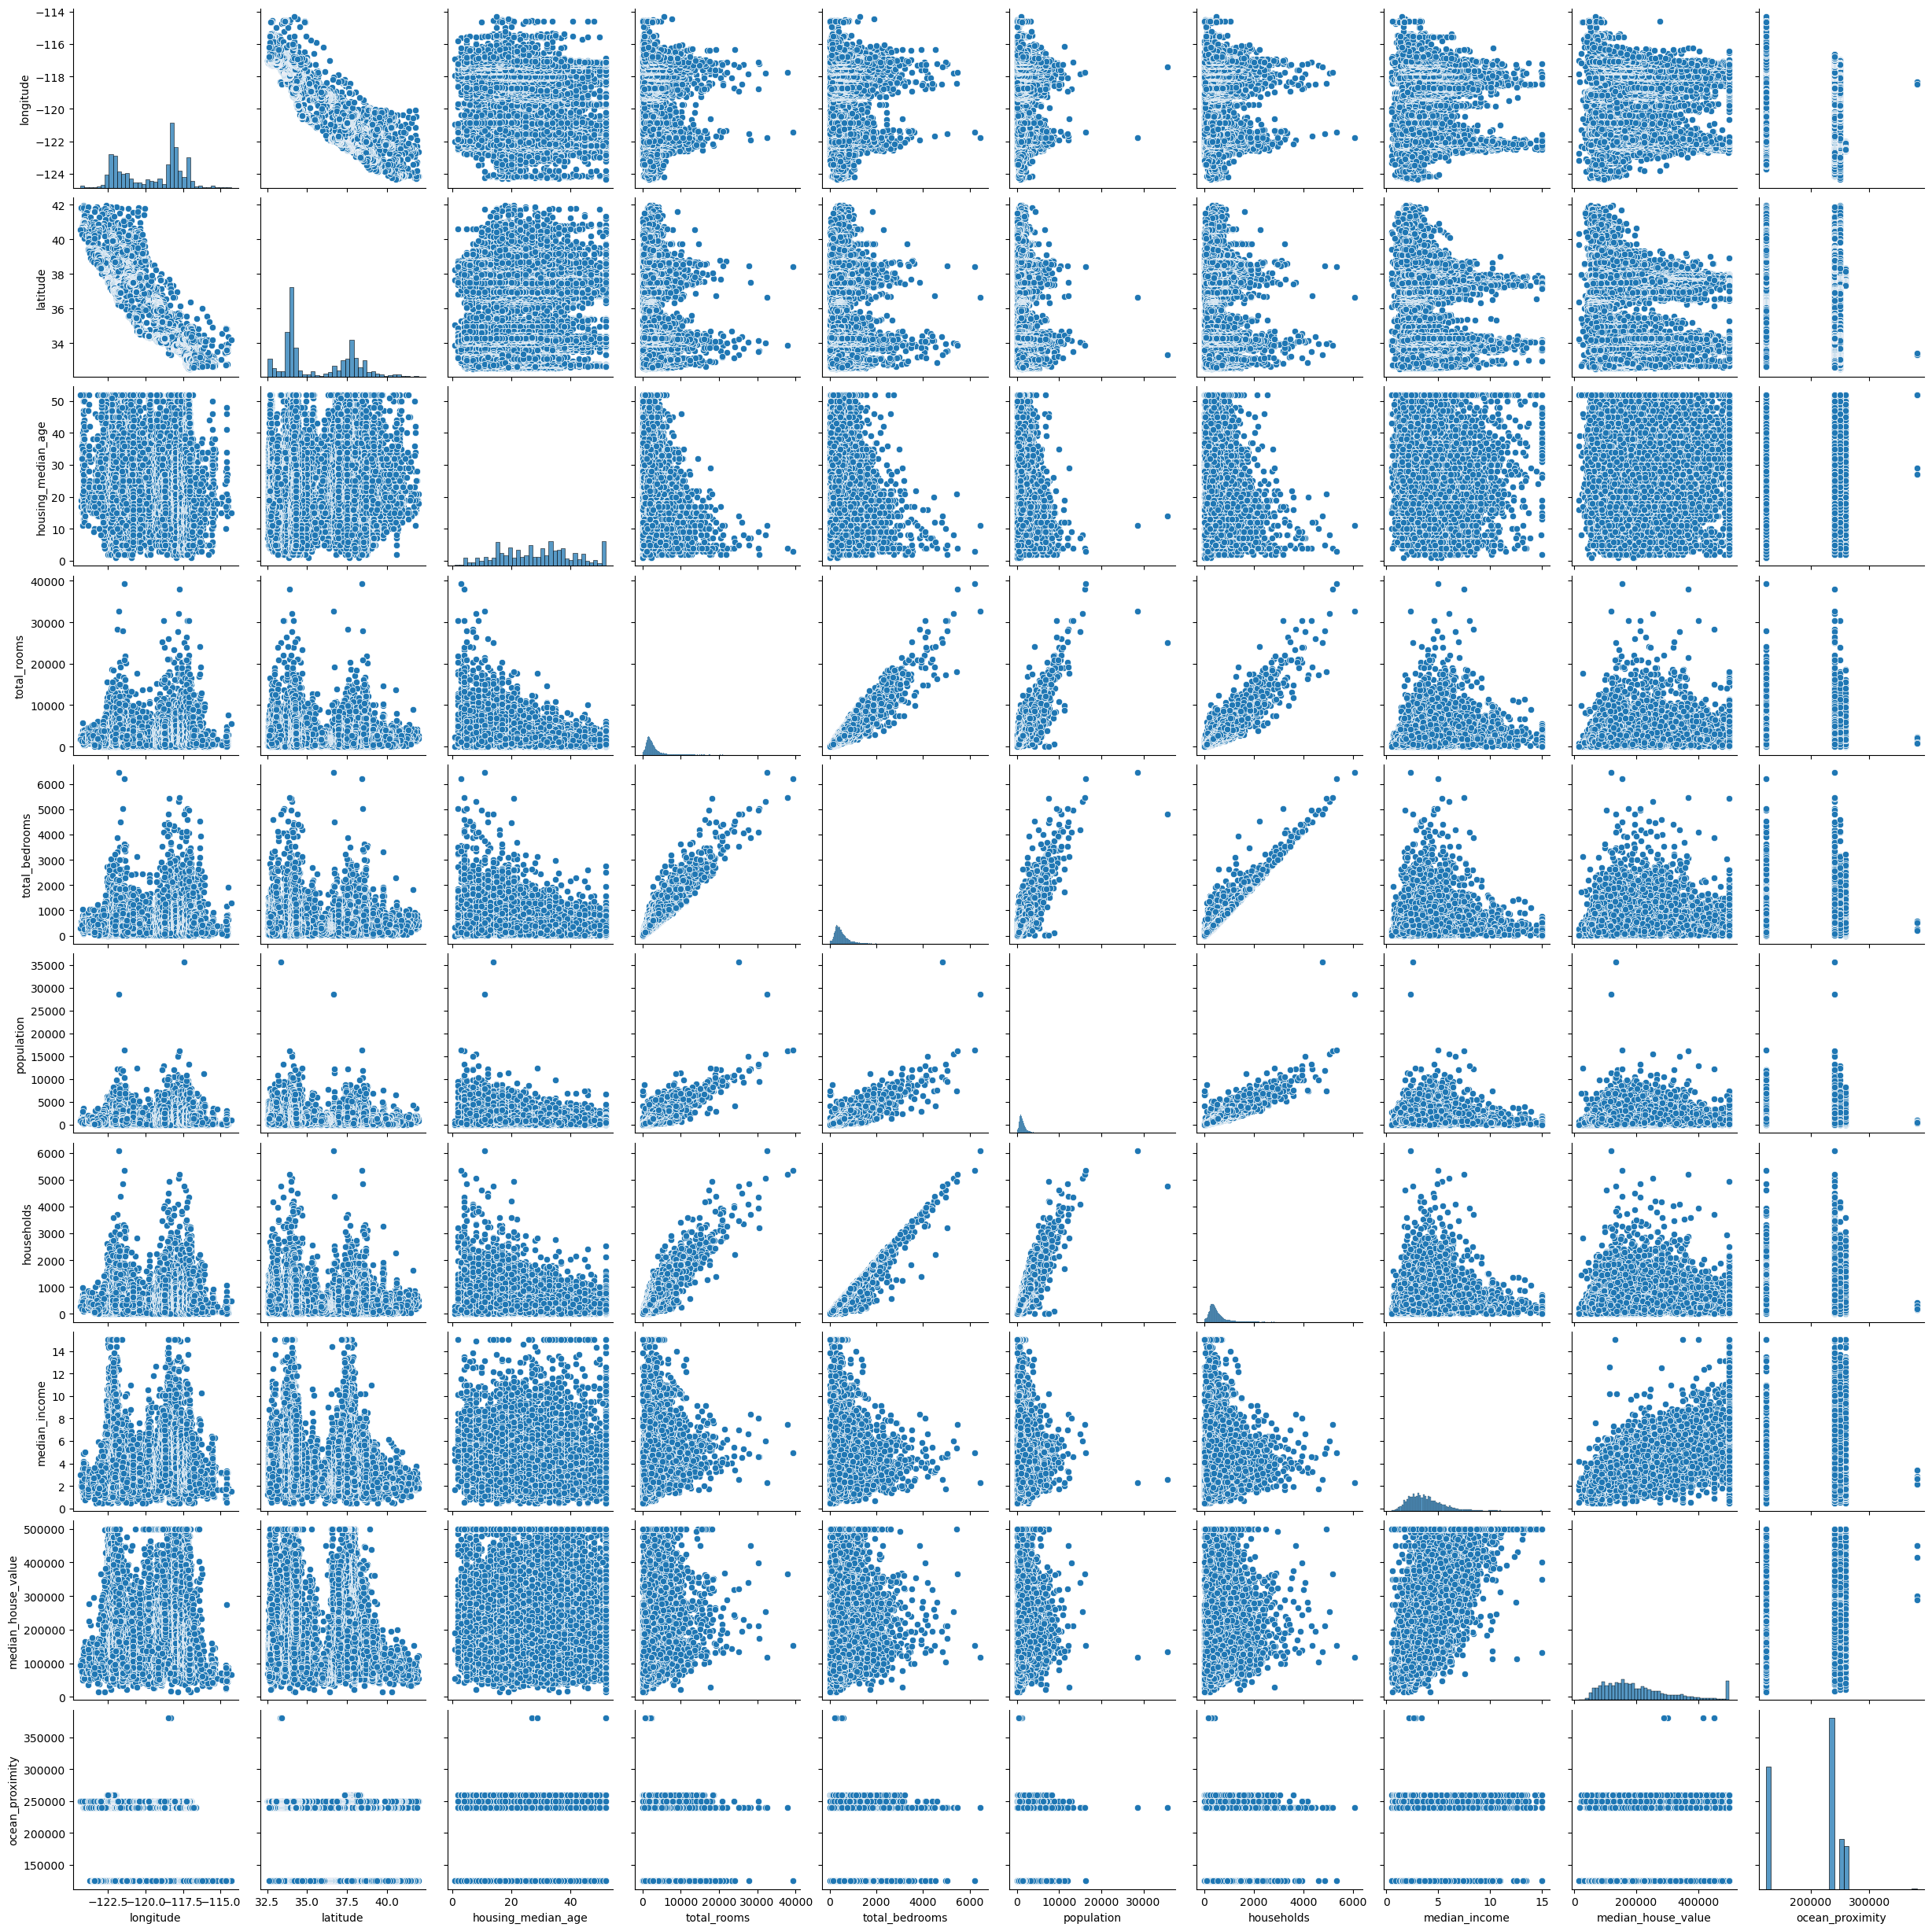

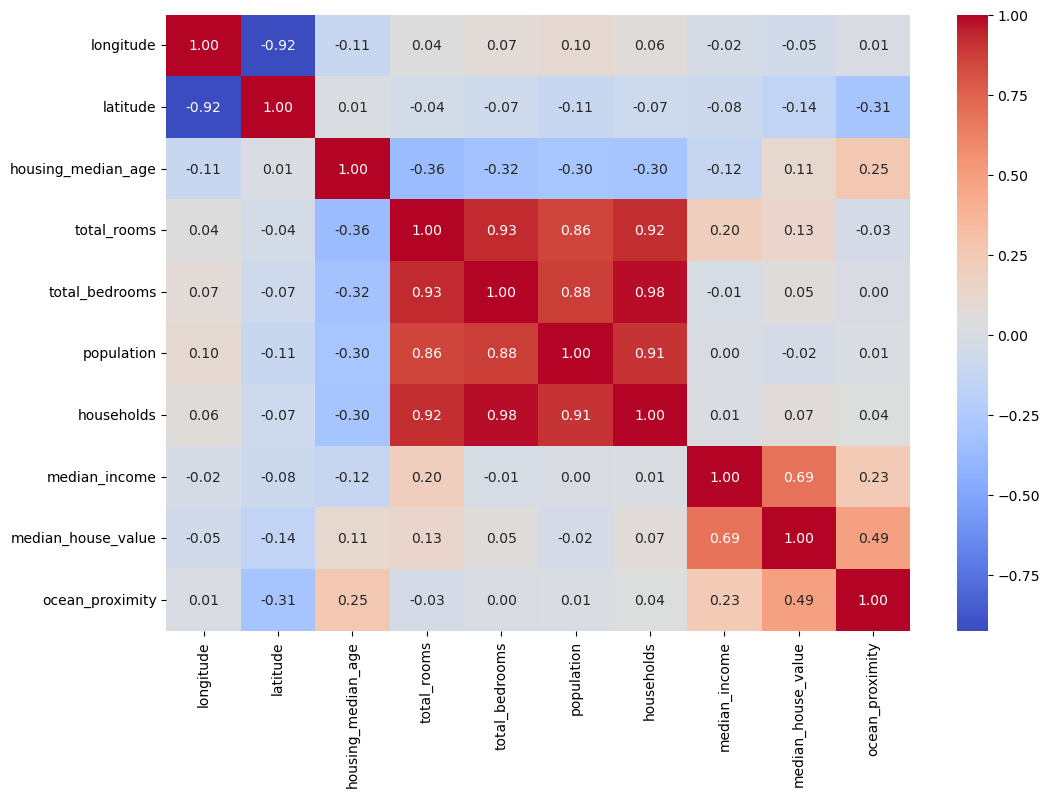

In [ ]:
# Exploratory Data Analysis (EDA)
sns.pairplot(df)
plt.show()
#correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [26]:
# All numeric features including ocean_proximity score
features = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income'
,'ocean_proximity']

X = df[features]
y = df['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred = lin_reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


RMSE: 68542.13
R²: 0.64
